In [ ]:
%pip install numpy matplotlib tensorflow

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
  Using cached setuptools-80.10.2-py3-none-any.whl.metadata (6.6 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 5.1 MB/s  0:00:035.1 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 3.1 MB/s  0:00:023.1 MB/s eta 0:00:01:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.8/620.8 MB 4.3 MB/s  0:02:40 eta 0:00:010:00:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 5.1 MB/s  0:00:015.4 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 4.4 MB/s  0:00:01m 4.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 2.7 MB/s  0:00:012.7 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 3.7 MB/s  0:00:01m 3.6 MB/s eta 0:00:01
Using cached typing_extensions-4.15.0-py3-none-any.whl

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import cifar10


## 1. Dataset Exploration (EDA)

Dataset = https://keras.io/api/datasets/cifar10/

In [ ]:
(train_X, train_Y),(test_X, test_Y) = cifar10.load_data()

/home/tulio/.pyenv/versions/3.13.9/lib/python3.13/site-packages/keras/src/datasets/cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")


Training Data Shape (50000, 32, 32, 3)


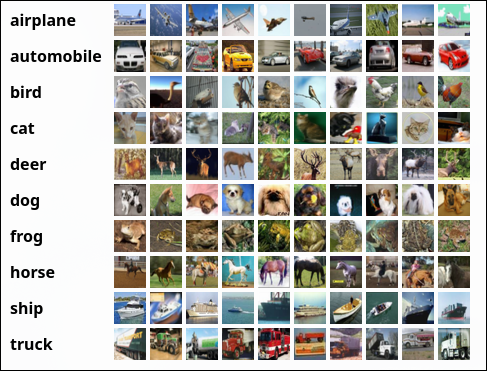

In [ ]:
print('Training Data Shape', train_X.shape, train_Y.shape)
print('Test Data Shape', test_X.shape, test_Y.shape)

Training Data Shape (50000, 32, 32, 3) (50000, 1)
Test Data Shape (10000, 32, 32, 3) (10000, 1)


In [16]:
classes = np.unique(train_Y)
nClasses = len(classes)

print('Output possibilities', classes)
print('Total of classes', nClasses)

Output possibilities [0 1 2 3 4 5 6 7 8 9]
Total of classes 10


Text(0.5, 1.0, 'Ground Truth: [9]')

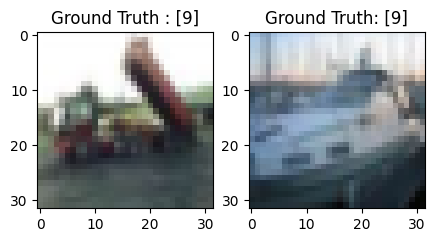

In [22]:
plt.figure(figsize=[5,5])
plt.subplot(121)
plt.imshow(train_X[2,:,:])
plt.title("Ground Truth : {}".format(train_Y[2]))

plt.subplot(122)
plt.imshow(test_X[2,:,:])
plt.title("Ground Truth: {}".format(train_Y[2]))

In [ ]:
train_X = train_X.reshape(-1, 32, 32, 3)
train_Y = train_Y.reshape(-1, 32, 32, 3)

## 2. Baseline Model (Non-Convolutional)

## 3. Convolutional Architecture Design

## 4. Controlled Experiments on the Convolutional Layer

## 5. Interpretation and Architectural Reasoning

## 6. Deployment in SageMaker